## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape
# 60000 samples are available in train 

(60000, 28, 28)

In [3]:
x_test.shape
# 10000 samples are available in test 

(10000, 28, 28)

In [0]:
""

### Find dimensions of an image in the dataset

In [5]:
x_train[0].shape

# 28x28 is the dimension

(28, 28)

In [0]:
u,counts = np.unique(y_train, return_counts=True)

In [24]:
counts

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
Ytrain = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
Ytest = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:

x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')


### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [74]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train,Ytrain,epochs=10,verbose=1,validation_data=(x_test,Ytest),callbacks=[cb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3745 - acc: 0.8649 - val_loss: 0.3070 - val_acc: 0.8918
Epoch 2/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2356 - acc: 0.9135 - val_loss: 0.2553 - val_acc: 0.9052
Epoch 3/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1717 - acc: 0.9356 - val_loss: 0.2675 - val_acc: 0.9059
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1212 - acc: 0.9555 - val_loss: 0.2611 - val_acc: 0.9130
Epoch 5/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0823 - acc: 0.9695 - val_loss: 0.3187 - val_acc: 0.9076
Epoch 6/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0549 - acc: 0.9800 - val_loss: 0.3543 - val_acc: 0.9079
Epoch 7/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0398 - acc: 0.9855 - val_l

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [75]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train,Ytrain,epochs=10,verbose=1,validation_data=(x_test,Ytest),callbacks=[cb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3911 - acc: 0.8586 - val_loss: 0.3100 - val_acc: 0.8878
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2628 - acc: 0.9042 - val_loss: 0.2558 - val_acc: 0.9052
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2131 - acc: 0.9214 - val_loss: 0.2280 - val_acc: 0.9172
Epoch 4/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1803 - acc: 0.9323 - val_loss: 0.2178 - val_acc: 0.9209
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1522 - acc: 0.9425 - val_loss: 0.2287 - val_acc: 0.9206
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1289 - acc: 0.9506 - val_loss: 0.2288 - val_acc: 0.9201
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1095 - acc: 0.9583 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
import keras

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

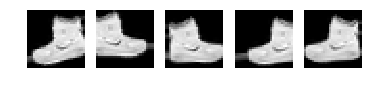

In [77]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [78]:
model.fit_generator(datagen.flow(x_train, Ytrain, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=50,validation_data=(x_test,Ytest))

Epoch 1/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7438 - acc: 0.7245 - val_loss: 0.3541 - val_acc: 0.8758
Epoch 2/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5502 - acc: 0.7952 - val_loss: 0.3564 - val_acc: 0.8720
Epoch 3/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5033 - acc: 0.8141 - val_loss: 0.3338 - val_acc: 0.8795
Epoch 4/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4696 - acc: 0.8252 - val_loss: 0.3308 - val_acc: 0.8797
Epoch 5/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4497 - acc: 0.8326 - val_loss: 0.3217 - val_acc: 0.8864
Epoch 6/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4323 - acc: 0.8394 - val_loss: 0.3260 - val_acc: 0.8879
Epoch 7/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4204 - acc: 0.8431 - val_loss: 0.3070 - val_acc: 0.8906
Epoch 8/50
1875/1875 [==========================

###  Report the final train and validation accuracy

In [0]:
# Train Accuracy - 88%
# Validation Accuracy - 89%

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [80]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
print('x_train shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [81]:
xtrain.dtype

dtype('uint8')

In [0]:
xtrain = (xtrain/255).astype('float32')
xtest = (xtest/255).astype('float32')

In [0]:

ytrain = keras.utils.to_categorical(ytrain, num_classes=10)
ytest = keras.utils.to_categorical(ytest, num_classes=10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
cifarDatagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
cifarDatagen.fit(xtrain)

### **Prepare/fit the generator.**

In [93]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=xtrain.shape[1:],activation='relu'))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),
                    steps_per_epoch=len(xtrain) / 32, epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
1563/1562 [==============================] - 30s 19ms/step - loss: 1.7636 - acc: 0.3435 - val_loss: 1.5232 - val_acc: 0.4371
Epoch 2/100
1563/1562 [==============================] - 30s 19ms/step - loss: 1.4786 - acc: 0.4598 - val_loss: 1.2403 - val_acc: 0.5447
Epoch 3/100
1563/1562 [==============================] - 29s 19ms/step - loss: 1.3712 - acc: 0.5033 - val_loss: 1.2272 - val_acc: 0.5638
Epoch 4/100
1563/1562 [==============================] - 29s 19ms/step - loss: 1.2990 - acc: 0.5320 - val_loss: 1.1375 - val_acc: 0.5865
Epoch 5/100
1563/1562 [==============================] - 29s 19ms/step - loss: 1.2476 - acc: 0.5544 - val_loss: 1.0700 - val_acc: 0.6142
Epoch 6/100
1563/1562 [==============================] - 30s 19ms/step - loss: 1.2111 - acc: 0.5705 - val_loss: 1.1149 - val_acc: 0.6056
Epoch 7/100
1563/1562 [==============================] - 29s 19ms/step - loss: 1.1842 - acc: 0.5765 - val_loss: 0.9849 - val_acc: 0.6525
Epoch 8/100
1563/1562 [==================

In [0]:
# Training accuracy - 68%
# Validation accuracy - 74%

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

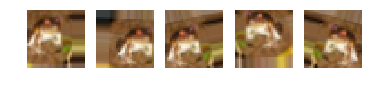

In [92]:
from matplotlib import pyplot as plt
gen = datagen.flow(xtrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()